In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text

  0% 0.00/814k [00:00<?, ?B/s]
100% 814k/814k [00:00<00:00, 127MB/s]


In [ ]:
!unzip indonesian-abusive-and-hate-speech-twitter-text.zip

Archive:  indonesian-abusive-and-hate-speech-twitter-text.zip
  inflating: README.md               
  inflating: abusive.csv             
  inflating: citation.bib            
  inflating: data.csv                
  inflating: new_kamusalay.csv       


In [ ]:
!pip install nlp-id

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 36.4 MB/s eta 0:00:00
  Created wheel for nlp-id: filename=nlp_id-0.1.14.0-py3-none-any.whl size=8074110 sha256=f80cf115ea45a0bd3d7579ffca2ed3386fed0cc4fcd6af038b771f8ac2dd8511
  Stored in directory: /root/.cache/pip/wheels/16/5d/1e/051d2642dfffeb89716569b4dad1552b6e8dd980572c5e3496
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=2fbbe1d1f4d55c6a74e50675c9c77dc929083bda5a8f6650dd5d1a7d0eb16f1d
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built nlp-id wget
  Attempting uninstall: pytest
    Found existing installation: pytest 7.2.2
    Uninstalling pytest-7.2.2:
      Su

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import string
from nlp_id.lemmatizer import Lemmatizer

In [ ]:
pd.set_option('mode.chained_assignment', None)

#Process Dataset

In [ ]:
df =  pd.read_csv("data.csv", encoding='latin-1')

In [ ]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
df.drop(columns=['HS'], inplace = True)
df.drop(columns=['Abusive'], inplace = True)
df.drop(columns=['HS_Individual'], inplace = True)
df.drop(columns=['HS_Group'], inplace = True)
df.drop(columns=['HS_Weak'], inplace = True)
df.drop(columns=['HS_Moderate'], inplace = True)
df.drop(columns=['HS_Strong'], inplace = True)

In [ ]:
df1 = df[(df['HS_Religion'] + df['HS_Race'] + df['HS_Physical'] + df['HS_Religion'] + df['HS_Gender'] +df['HS_Other'] ) != 0]

In [ ]:
df1

,Tweet,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other
0,- disaat semua cowok berusaha melacak perhatia...,0,0,0,0,1
4,USER USER Kaum cebong kapir udah keliatan dong...,1,0,0,0,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,0,0,0,0,1
10,"Setidaknya gw punya jari tengah buat lu, sebel...",0,0,0,0,1
11,USER USER USER USER BANCI KALENG MALU GA BISA ...,0,0,0,1,0
...,...,...,...,...,...,...
13157,"USER Pak Recep..............anda salah, itu gu...",0,0,0,0,1
13161,brengsek itu orang terbuat dr apa bikin gue be...,0,0,0,0,1
13162,Kapolda Babi! Biadap dan Bodoh! Gak punya otak...,0,0,0,0,1
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,0,0,1,0,0


#Preprocessing Data

In [ ]:
#Remove Punctuation
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [ ]:
lemmatizer = Lemmatizer()
def stem_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [ ]:
df1['clean_text'] = df1['Tweet']
df1['clean_text'] = df1["clean_text"].str.lower()
df1["clean_text"] = df1["clean_text"].apply(lambda text: remove_punctuation(text))
df1["clean_text"] = df1["clean_text"].apply(lambda text: stem_words(text))
df1

,Tweet,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,clean_text
0,- disaat semua cowok berusaha melacak perhatia...,0,0,0,0,1,saat semua cowok usaha lacak perhati gue loe l...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,0,0,0,0,user user kaum cebong kapir udah liat dongok d...
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,0,0,0,0,1,user ya bani taplak dkk xf0x9fx98x84xf0x9fx98x...
10,"Setidaknya gw punya jari tengah buat lu, sebel...",0,0,0,0,1,tidak gw punya jari tengah buat lu bom gw ukur...
11,USER USER USER USER BANCI KALENG MALU GA BISA ...,0,0,0,1,0,user user user user banci kaleng malu ga bisa ...
...,...,...,...,...,...,...,...
13157,"USER Pak Recep..............anda salah, itu gu...",0,0,0,0,1,user pak recepanda salah itu gubernur pakkkkbu...
13161,brengsek itu orang terbuat dr apa bikin gue be...,0,0,0,0,1,brengsek itu orang buat dr apa bikin gue kata ...
13162,Kapolda Babi! Biadap dan Bodoh! Gak punya otak...,0,0,0,0,1,kapolda babi biadap dan bodoh gak punya otak kali
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,0,0,1,0,0,user jangan asal ngomong ndasmu congor lu yg s...


In [ ]:
from collections import Counter
cnt = Counter()
for text in df1["clean_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(50)

[('user', 7947),
 ('yg', 1249),
 ('di', 907),
 ('dan', 788),
 ('itu', 658),
 ('jokowi', 629),
 ('ini', 617),
 ('rt', 573),
 ('url', 506),
 ('cebong', 463),
 ('yang', 431),
 ('jadi', 426),
 ('aja', 412),
 ('ada', 404),
 ('ya', 403),
 ('lu', 374),
 ('gak', 365),
 ('islam', 365),
 ('orang', 333),
 ('indonesia', 324),
 ('ga', 311),
 ('lo', 307),
 ('si', 303),
 ('mau', 303),
 ('pak', 301),
 ('cina', 296),
 ('2019gantipresiden', 293),
 ('ahok', 292),
 ('sama', 290),
 ('apa', 290),
 ('presiden', 289),
 ('nya', 285),
 ('agama', 282),
 ('dari', 275),
 ('dia', 268),
 ('bisa', 267),
 ('rakyat', 251),
 ('juga', 226),
 ('rezim', 226),
 ('pki', 224),
 ('ke', 215),
 ('lagi', 215),
 ('bukan', 214),
 ('tapi', 210),
 ('buat', 206),
 ('kita', 203),
 ('komunis', 203),
 ('prabowo', 201),
 ('kalo', 198),
 ('semua', 191)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(5)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

In [ ]:
RAREWORDS = set([w for (w, wc) in cnt.most_common() if wc <=5])
def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

In [ ]:
from nlp_id.stopword import StopWord
stopword = StopWord()
def remove_stopwords(text):
  return " ".join([stopword.remove_stopword(word) for word in text.split()])

In [ ]:
df1["clean_text"] = df1["clean_text"].apply(lambda text: remove_rarewords(text))
df1["clean_text"] = df1["clean_text"].apply(lambda text: remove_freqwords(text))
df1["clean_text"] = df1["clean_text"].apply(lambda text: remove_stopwords(text))

df1

,Tweet,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,clean_text
0,- disaat semua cowok berusaha melacak perhatia...,0,0,0,0,1,cowok usaha perhati loe perhati kasih elo...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,0,0,0,0,kaum cebong kapir liat dongok dongok hahahah
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,0,0,0,0,1,bani taplak
10,"Setidaknya gw punya jari tengah buat lu, sebel...",0,0,0,0,1,gw lu bom gw nyali bacot lu
11,USER USER USER USER BANCI KALENG MALU GA BISA ...,0,0,0,1,0,banci kaleng malu ga 2 nyungsep url
...,...,...,...,...,...,...,...
13157,"USER Pak Recep..............anda salah, itu gu...",0,0,0,0,1,salah gubernur presiden presiden nih liat k...
13161,brengsek itu orang terbuat dr apa bikin gue be...,0,0,0,0,1,brengsek orang dr bikin kasar mulu
13162,Kapolda Babi! Biadap dan Bodoh! Gak punya otak...,0,0,0,0,1,babi bodoh gak otak
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,0,0,1,0,0,ngomong congor lu


In [ ]:
x = df1[['clean_text']]
y = df1[['HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other']]

#Model and Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, multilabel_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

description_list = df1['clean_text'].tolist()
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(description_list)
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, y, test_size=0.3, shuffle=True, random_state=100)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultiOutputClassifier(MultinomialNB()).fit(train_x,train_y)
y_score = clf.predict(test_x)

Accuracy: 73.88%
              precision    recall  f1-score   support

 HS_Religion       0.91      0.42      0.57       239
     HS_Race       0.97      0.33      0.49       178
 HS_Physical       1.00      0.15      0.26        95
   HS_Gender       0.91      0.12      0.21        86
    HS_Other       0.82      0.97      0.89      1108

   micro avg       0.84      0.73      0.78      1706
   macro avg       0.92      0.40      0.48      1706
weighted avg       0.86      0.73      0.73      1706
 samples avg       0.75      0.74      0.75      1706



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


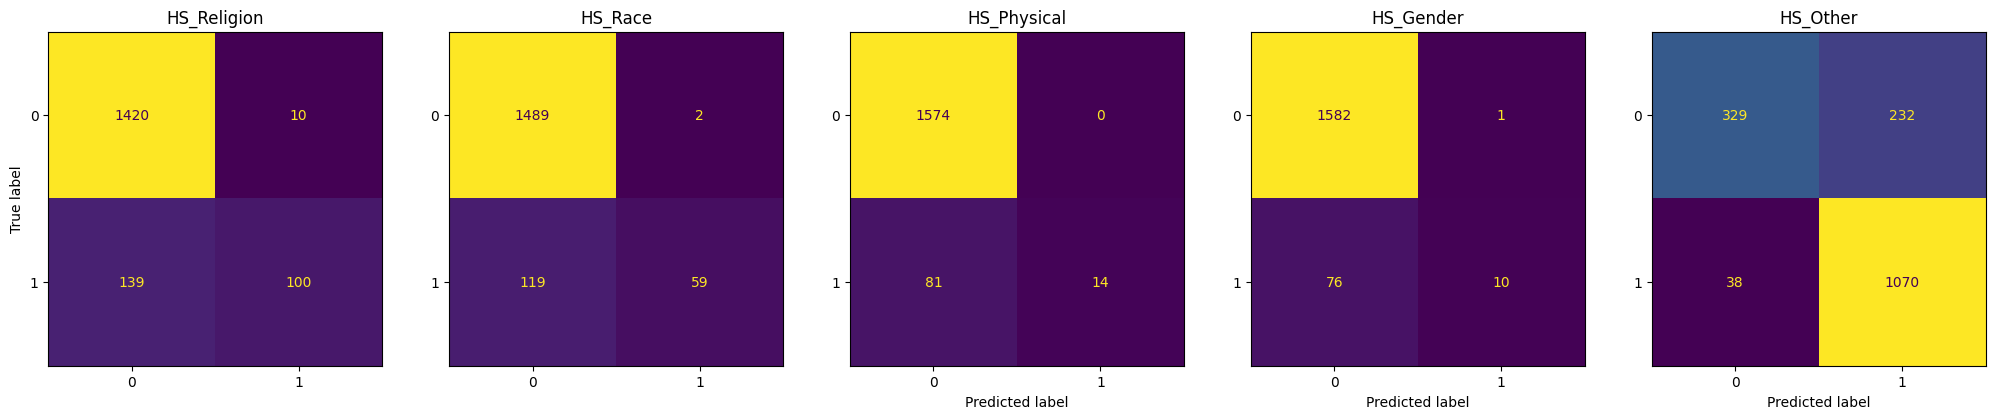

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(test_y, y_score) * 100))
eval_report = classification_report(test_y, y_score, target_names=y.columns)
print(eval_report)

mcm = multilabel_confusion_matrix(test_y, y_score)

mcm_disp = ConfusionMatrixDisplay(mcm)

f, axes = plt.subplots(1, 5, figsize=(25, 5))
axes = axes.ravel()

for i in range(5):
  disp = ConfusionMatrixDisplay(mcm[i], display_labels=[0, 1])
  disp.plot(ax=axes[i], values_format='.4g')
  disp.ax_.set_title(f'{y.columns[i]}')
  if i<2:
      disp.ax_.set_xlabel('')
  if i%5!=0:
      disp.ax_.set_ylabel('')
  disp.im_.colorbar.remove()

In [ ]:
from sklearn.svm import SVC

clf = MultiOutputClassifier(SVC()).fit(train_x,train_y)
y_score = clf.predict(test_x)

Accuracy: 80.53%
              precision    recall  f1-score   support

 HS_Religion       0.87      0.60      0.71       239
     HS_Race       0.89      0.66      0.76       178
 HS_Physical       0.91      0.31      0.46        95
   HS_Gender       0.96      0.29      0.45        86
    HS_Other       0.85      0.96      0.90      1108

   micro avg       0.86      0.81      0.83      1706
   macro avg       0.90      0.56      0.65      1706
weighted avg       0.86      0.81      0.81      1706
 samples avg       0.82      0.82      0.81      1706



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


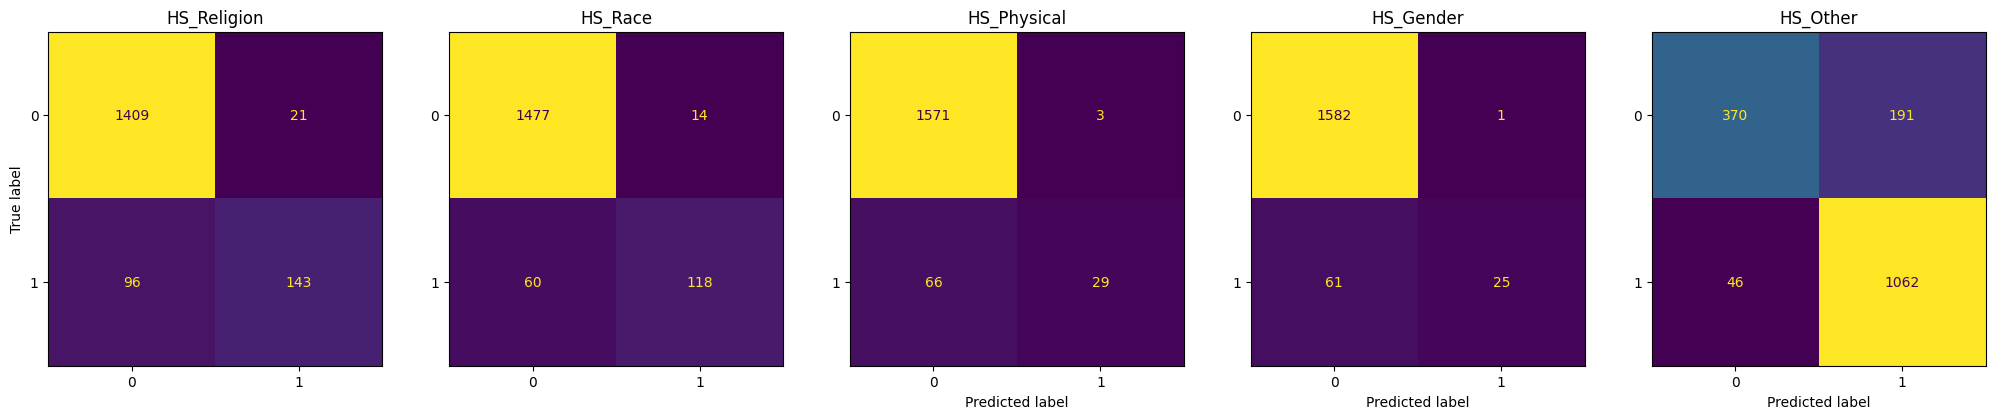

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(test_y, y_score) * 100))
eval_report = classification_report(test_y, y_score, target_names=y.columns)
print(eval_report)

mcm = multilabel_confusion_matrix(test_y, y_score)

mcm_disp = ConfusionMatrixDisplay(mcm)

f, axes = plt.subplots(1, 5, figsize=(25, 5))
axes = axes.ravel()

for i in range(5):
  disp = ConfusionMatrixDisplay(mcm[i], display_labels=[0, 1])
  disp.plot(ax=axes[i], values_format='.4g')
  disp.ax_.set_title(f'{y.columns[i]}')
  if i<2:
      disp.ax_.set_xlabel('')
  if i%5!=0:
      disp.ax_.set_ylabel('')
  disp.im_.colorbar.remove()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = MultiOutputClassifier(RandomForestClassifier()).fit(train_x,train_y)
y_score = clf.predict(test_x)

Accuracy: 82.03%
              precision    recall  f1-score   support

 HS_Religion       0.81      0.77      0.79       239
     HS_Race       0.82      0.77      0.79       178
 HS_Physical       0.79      0.44      0.57        95
   HS_Gender       0.87      0.53      0.66        86
    HS_Other       0.90      0.92      0.91      1108

   micro avg       0.87      0.84      0.85      1706
   macro avg       0.84      0.69      0.74      1706
weighted avg       0.87      0.84      0.85      1706
 samples avg       0.84      0.84      0.84      1706



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


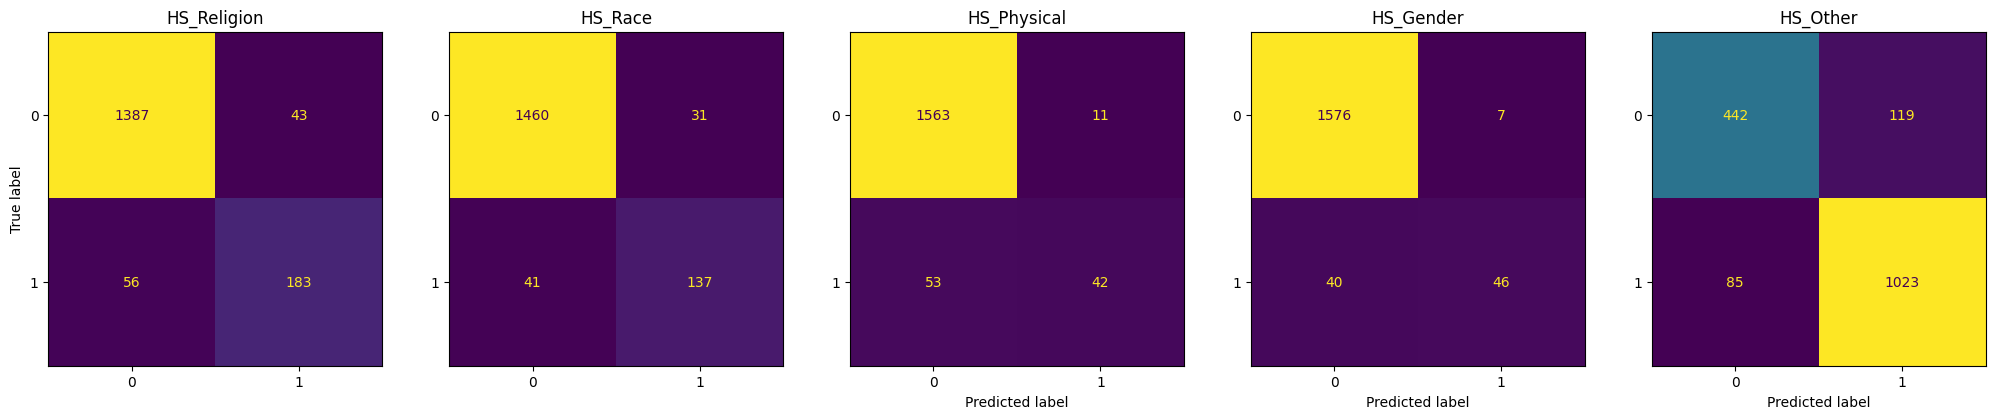

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(test_y, y_score) * 100))
eval_report = classification_report(test_y, y_score, target_names=y.columns)
print(eval_report)

mcm = multilabel_confusion_matrix(test_y, y_score)

mcm_disp = ConfusionMatrixDisplay(mcm)

f, axes = plt.subplots(1, 5, figsize=(25, 5))
axes = axes.ravel()

for i in range(5):
  disp = ConfusionMatrixDisplay(mcm[i], display_labels=[0, 1])
  disp.plot(ax=axes[i], values_format='.4g')
  disp.ax_.set_title(f'{y.columns[i]}')
  if i<2:
      disp.ax_.set_xlabel('')
  if i%5!=0:
      disp.ax_.set_ylabel('')
  disp.im_.colorbar.remove()